·粒子群优化算法

·PSO算法首先在可行解空间中初始化一群粒子，每个粒子都代表极值优化问题的一个潜在最优解，用位置、速度、适应度三项指标表示该粒子特征。
·粒子在解空间中运动，通过跟踪个体极值Pbest和群体极值Gbest更新个体位置，个体极值Pbest是指个体所经历中计算得到的适应度值最优位置，群体极值Gbest是指种群中得所有粒子搜索到的适应度最优位置。
·粒子每更新一次位置，就计算一次适应度值，并且通过比较新粒子的适应度值和个体极值、群体极值的适应度值更新个体极值Pbest和群体极值Gbest位置。

全局最优适应度值为80.701735,全局最优解为[4.591123,4.566197]


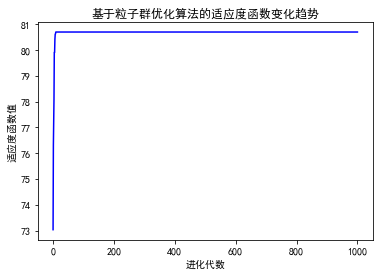

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter

matplotlib.rcParams['font.family']='simHei'   #中文显示
matplotlib.rcParams['axes.unicode_minus'] = False #解决负号'-'显示为方块的问题 
#参数初始化
c1=1.49445
c2=c1
maxgen=1000#进化次数
sizepop=100#种群规模
Vmax=1
Vmin=-1
popmax=5#自变量的范围
popmin=-5
pop=[]#种群
v=[]#粒子的速度
fitness=[]#用于存储适应度值
fitness_zbest_change=[]#用于存储每一步中变化的适应度值

def fun(x):
    return x[0]**2+x[1]**2-10*np.cos(2*np.pi*x[0])-10*np.cos(2*np.pi*x[1])+20
def Omega(x):
    omega_start=0.9
    omega_end=0.4
    omega_x=omega_start-(omega_start-omega_end)*(maxgen-x)/maxgen
    return omega_x
for i in range(sizepop):
    #随机产生一个种群
    pop.append([random.uniform(popmin,popmax),random.uniform(popmin,popmax)])#初始化种群
    v.append([random.uniform(Vmin,Vmax),random.uniform(Vmin,Vmax)])#初始化速度
    fitness.append(fun(pop[i]))#计算适应度
pop=np.array(pop)
v=np.array(v)
fitness=np.array(fitness)
#print(pop)
#print('*'*25)
#print(v)
#print('*'*25)
#print(fitness)
#print('*'*25)
#体极值和群体极值
best_fitness=np.max(fitness)
best_index=np.argmax(fitness)
gbest=pop#个体最佳适应度值
zbest=pop[best_index]#全局最优值
fitness_gbest=fitness#个体最优适应度值
fitness_zbest=best_fitness
#迭代寻优
for i in range(maxgen):
    for j in range(sizepop):
        #速度更新
        v[j]=Omega(i)*v[j]+c1*random.random()*(gbest[j]-pop[j])+c2*random.random()*(zbest-pop[j])
        v[j][v[j]>Vmax]=Vmax
        v[j][v[j]<Vmin]=Vmin
        #种群更新
        pop[j]=pop[j]+v[j]
        pop[j][pop[j]>popmax]=popmax
        pop[j][pop[j]<popmin]=popmin
        #适应度值更新
        fitness[j]=fun(pop[j])
    for n in range(sizepop):
        #个体最优值更新
        if fitness[n]>fitness_gbest[n]:
            fitness_gbest[n]=fitness[n]
            gbest[n]=pop[n]
        #群体最优值更新
        if fitness[n]>fitness_zbest:
            fitness_zbest=fitness[n]
            zbest=pop[n]
    fitness_zbest_change.append(fitness_zbest)
print("全局最优适应度值为%f,全局最优解为[%f,%f]"%(fitness_zbest,zbest[0],zbest[1]))
generation=[i for i in range(1,maxgen+1)]
plt.plot(generation,fitness_zbest_change,'b-',label='适应度函数变化趋势')
plt.xlabel('进化代数')
plt.ylabel('适应度函数值')
plt.title('基于粒子群优化算法的适应度函数变化趋势')
plt.show()

全局最优适应度值为70.5340,全局最优解为：
x[0]=5.000000 x[1]=5.000000 

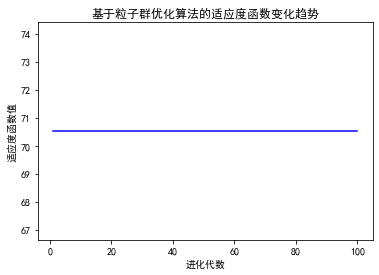

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

matplotlib.rcParams['font.family']='simHei'   #中文显示
matplotlib.rcParams['axes.unicode_minus'] = False #解决负号'-'显示为方块的问题 

def fun(x):
    
    return x[0]**2+x[1]**2-10*np.cos(2*np.pi*x[0])-10*np.cos(2*np.pi*x[1])+20

class Pso:
    def __init__(self,fun,dimension_num,maxgen,sizepop,popmin,popmax):#目标函数，迭代次数，种群大小，个体边界
        #传入函数
        self.fun=fun
        self.dimension_num=dimension_num
        #参数初始化
        self.c1=1.49445
        self.c2=1.49445       
        self.maxgen=maxgen#进化次数
        self.sizepop=sizepop#种群规模
        self.Vmax=1
        self.Vmin=-1
        self.popmax=popmax#自变量的范围
        self.popmin=popmin
        self.pop=[]#种群
        self.v=[]#粒子的速度
        self.fitness=[]#用于存储适应度值
        self.fitness_zbest_change=[]#用于存储每一步中变化的适应度值
        self.generation=[i for i in range(1,self.maxgen+1)]#存储迭代次数，方便后续画图
    def Omega(self,x):
        omega_start=0.9
        omega_end=0.4
        omega_x=omega_start-(omega_start-omega_end)*(self.maxgen-x)/self.maxgen
        return omega_x
    def PSO(self):
        def drawing_2D(generation,fitness_zbest_change):
            plt.plot(generation,fitness_zbest_change,'b-',label='适应度函数变化趋势')
            plt.xlabel('进化代数')
            plt.ylabel('适应度函数值')
            plt.title('基于粒子群优化算法的适应度函数变化趋势')
            plt.show()
        for i in range(self.sizepop):
            #随机产生一个种群
            x_pop=[]
            for j in range(self.dimension_num):
                x_pop.append(random.uniform(self.popmin,self.popmax))
            self.pop.append(x_pop)#初始化种群
            v_pop=[]
            for j in range(self.dimension_num):
                v_pop.append(random.uniform(self.Vmin,self.Vmax))
            self.v.append(v_pop)#初始化速度
            self.fitness.append(self.fun(self.pop[i]))#计算适应度
        self.pop=np.array(self.pop)
        self.v=np.array(self.v)
        self.fitness=np.array(self.fitness)
        #个体极值和群体极值
        best_fitness=np.max(self.fitness)
        best_index=np.argmax(self.fitness)
        gbest=self.pop#个体最佳适应度值
        zbest=self.pop[best_index]#全局最优值
        fitness_gbest=self.fitness#个体最优适应度值
        fitness_zbest=best_fitness
        #迭代寻优
        for i in range(self.maxgen):
            for j in range(self.sizepop):
                #速度更新
                self.v[j]=self.Omega(i)*self.v[j]+self.c1*random.random()*(gbest[j]-self.pop[j])+self.c2*random.random()*(zbest-self.pop[j])
                self.v[j][self.v[j]>self.Vmax]=self.Vmax
                self.v[j][self.v[j]<self.Vmin]=self.Vmin
                #种群更新
                self.pop[j]=self.pop[j]+self.v[j]
                self.pop[j][self.pop[j]>self.popmax]=self.popmax
                self.pop[j][self.pop[j]<self.popmin]=self.popmin
                #适应度值更新
                self.fitness[j]=self.fun(self.pop[j])
            for n in range(self.sizepop):
                #个体最优值更新
                if self.fitness[n]>fitness_gbest[n]:
                    fitness_gbest[n]=self.fitness[n]
                    gbest[n]=self.pop[n]
                #群体最优值更新
                if self.fitness[n]>fitness_zbest:
                    fitness_zbest=self.fitness[n]
                    zbest=self.pop[n]
            self.fitness_zbest_change.append(fitness_zbest)
        print("全局最优适应度值为{:.4f},全局最优解为：".format(fitness_zbest))
        for i in range(len(zbest)):
            print("x[%d]=%f"%(i,zbest[i]),end=' ')
        drawing_2D(self.generation,self.fitness_zbest_change)
#popmin=np.array([(-160/180)*np.pi,(-150/180)*np.pi,(-200/180)*np.pi,(-180/180)*np.pi,(-120/180)*np.pi,(-180/180)*np.pi])
#popmax=np.array([(160/180)*np.pi,(150/180)*np.pi,(80/180)*np.pi,(180/180)*np.pi,(120/180)*np.pi,(180/180)*np.pi])
solving_problem=Pso(fun,2,100,100,5,-5)
solving_problem.PSO()



·多目标粒子群优化算法（MOPSO）

·多目标粒子群优化算法（MOPSO）是一种用于解决多目标优化问题的进化算法，它基于粒子群优化算法，通过维护粒子群中每个粒子的帕累托解集，实现了对多个目标的同时规划。MOPSO算法的基本思想是将优化问题转化为一个多目标优化问题，并求解该问题的帕累托最优解集。
具体实现过程如下：
    1.初始化粒子群的位置和速度，并为每一个粒子分配一个随机的个体最优解
    2.计算每个粒子的适应度值，以确定其在帕累托解集中的位置
    3.根据粒子的速度来更新粒子的位置
    4.根据新位置计算适应度值，并更新个体和全局最优解集
    5.重复步骤34，直到满足停止条件
    6.输出帕累托最优解

In [2]:
import numpy as np
def determinDomination(particals_x,particals_fitness):
        domination_matrix = np.zeros((len(particals_x),len(particals_x)))
        arching_index = []
        def isDominates(x, y):
            re = 0
            # 如果x均小于y，则x支配y，即可将y的Domination设为True
            if (x <= y).all() and (x < y).any():
                re = 1
            return re
        #根据目标函数适应度，获得当前粒子群的pareto边界，将边界粒子加入到存档archiving中
        for i in range(len(particals_x)):
            for j in range(len(particals_x)):
                domination_matrix[i][j] = isDominates(particals_fitness[i],particals_fitness[j])   #i支配j，按行看
        for i in range(len(particals_x)):  #按列看，如果该列全为0，则为非劣解
            if (domination_matrix[:,i]==0).all():
                arching_index.append(i)
        arching_index = np.array(arching_index)
        arching_x = particals_x[arching_index].copy()
        arching_fit = particals_fitness[arching_index].copy()
        return arching_x , arching_fit
#搜索全局最优解
def update_Pbest(self,P_x,P_fit,particals_x,particals_fitness):
        for i in range(self.nums):
            if (particals_fitness[i]<P_fit[i]).all():
                P_x[i] = particals_x[i]
                P_fit[i] = particals_fitness[i]
            elif  (P_fit[i]<particals_fitness[i]).all():
                P_x[i] = P_x[i]
                P_fit[i] = P_fit[i]
            else:
                prob = np.random.random()
                if prob>0.5:
                    P_x[i] = particals_x[i]
                    P_fit[i] = particals_fitness[i]
                else:
                    P_x[i] = P_x[i]
                    P_fit[i] = P_fit[i]
        return P_x , P_fit
#搜索个体最优解
def select_gbest(self,arching_x,arching_fit):

        # 按目标函数1进行降序排序
        index_list = np.argsort(arching_fit[:,0])[::-1]
        # 创建crow_matrix矩阵，第一列用来储存索引，第二列用来储存相应的拥挤度,将端点拥挤度设为1e8
        crow_matrix = np.ones((len(index_list),2))
        crow_matrix[:,0] = index_list
        crow_matrix[:,1] = np.ones(len(index_list)) * -1 * 1e8
        j = 1
        for i in index_list[1:-1]:

            crow_dist = sum(np.abs(arching_fit[index_list[j+1]]   - arching_fit[index_list[j-1]]))
            idx = np.where(index_list==i)[0]
            crow_matrix[idx,1] = crow_dist
            j = j + 1

        index = int(crow_matrix[np.argmax(crow_matrix[:,1]),0])
        G_x = arching_x[index]
        G_x_fit = arching_fit[index]

        return G_x , G_x_fit

全局最优适应度值为79.8735,全局最优解为：
x[0]=5.000000 x[1]=5.000000 

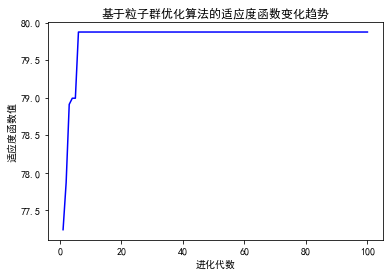

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

matplotlib.rcParams['font.family']='simHei'   #中文显示
matplotlib.rcParams['axes.unicode_minus'] = False #解决负号'-'显示为方块的问题 

def fun(x):
    
    return x[0]**2+x[1]**2-10*np.cos(2*np.pi*x[0])-10*np.cos(2*np.pi*x[1])+20


class Pso:
    def __init__(self,fun,dimension_num,maxgen,sizepop,popmin,popmax):#目标函数，迭代次数，种群大小，个体边界
        #传入函数
        self.fun=fun
        self.dimension_num=dimension_num
        #参数初始化
        self.c1=1.49445
        self.c2=1.49445       
        self.maxgen=maxgen#进化次数
        self.sizepop=sizepop#种群规模
        self.Vmax=1
        self.Vmin=-1
        self.popmax=popmax#自变量的范围
        self.popmin=popmin
        self.pop=[]#种群
        self.v=[]#粒子的速度
        self.fitness=[]#用于存储适应度值
        self.fitness_zbest_change=[]#用于存储每一步中变化的适应度值
        self.generation=[i for i in range(1,self.maxgen+1)]#存储迭代次数，方便后续画图
    def Omega(self,x):
        omega_start=0.9
        omega_end=0.4
        omega_x=omega_start-(omega_start-omega_end)*(self.maxgen-x)/self.maxgen
        return omega_x
    def PSO(self):
        def drawing_2D(generation,fitness_zbest_change):
            plt.plot(generation,fitness_zbest_change,'b-',label='适应度函数变化趋势')
            plt.xlabel('进化代数')
            plt.ylabel('适应度函数值')
            plt.title('基于粒子群优化算法的适应度函数变化趋势')
            plt.show()
        for i in range(self.sizepop):
            #随机产生一个种群
            x_pop=[]
            for j in range(self.dimension_num):
                x_pop.append(random.uniform(self.popmin[j],self.popmax[j]))
            self.pop.append(x_pop)#初始化种群
            v_pop=[]
            for j in range(self.dimension_num):
                v_pop.append(random.uniform(self.Vmin,self.Vmax))
            self.v.append(v_pop)#初始化速度
            self.fitness.append(self.fun(self.pop[i]))#计算适应度
        self.pop=np.array(self.pop)
        self.v=np.array(self.v)
        self.fitness=np.array(self.fitness)
        #个体极值和群体极值
        best_fitness=np.max(self.fitness)
        best_index=np.argmax(self.fitness)
        gbest=self.pop#个体最佳适应度值
        zbest=self.pop[best_index]#全局最优值
        fitness_gbest=self.fitness#个体最优适应度值
        fitness_zbest=best_fitness
        #迭代寻优
        for i in range(self.maxgen):
            for j in range(self.sizepop):
                #速度更新
                self.v[j]=self.Omega(i)*self.v[j]+self.c1*random.random()*(gbest[j]-self.pop[j])+self.c2*random.random()*(zbest-self.pop[j])
                self.v[j][self.v[j]>self.Vmax]=self.Vmax
                self.v[j][self.v[j]<self.Vmin]=self.Vmin
                #种群更新
                self.pop[j]=self.pop[j]+self.v[j]
                for z in range(self.dimension_num):
                    if self.pop[j][z]>self.popmax[z]:
                        self.pop[j][z]=self.popmax[z]
                    if self.pop[j][z]<self.popmin[z]:
                        self.pop[j][z]=self.popmin[z]
                #适应度值更新
                self.fitness[j]=self.fun(self.pop[j])
            for n in range(self.sizepop):
                #个体最优值更新
                if self.fitness[n]>fitness_gbest[n]:
                    fitness_gbest[n]=self.fitness[n]
                    gbest[n]=self.pop[n]
                #群体最优值更新
                if self.fitness[n]>fitness_zbest:
                    fitness_zbest=self.fitness[n]
                    zbest=self.pop[n]
            self.fitness_zbest_change.append(fitness_zbest)
        print("全局最优适应度值为{:.4f},全局最优解为：".format(fitness_zbest))
        for i in range(len(zbest)):
            print("x[%d]=%f"%(i,zbest[i]),end=' ')
        drawing_2D(self.generation,self.fitness_zbest_change)
popmin=np.array([-5,-5])
popmax=np.array([5,5])

solving_problem=Pso(fun,2,100,100,popmin,popmax)
solving_problem.PSO()